In [7]:
# !pip3 install nltk

In [8]:
import glob
import json
from collections import Counter
import nltk
from nltk.util import bigrams
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from tqdm import tqdm
import numpy as np
# nltk.download('punkt')
# nltk.download()

In [9]:
# each jsonl file contains multiple json objects, each its own document
llm_gen_text_path = "PAN Data_PAN Competition/pan24-generative-authorship-news/pan24-generative-authorship-news\machines/*.jsonl"

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\345li\AppData\Local\Temp\ipykernel_26904\3517834828.py:2: SyntaxWarning: invalid escape sequence '\m'
  llm_gen_text_path = "PAN Data_PAN Competition/pan24-generative-authorship-news/pan24-generative-authorship-news\machines/*.jsonl"


In [10]:
human_text_path = "PAN Data_PAN Competition/pan24-generative-authorship-news/pan24-generative-authorship-news/human.jsonl"

In [15]:
# get bigrams of llm-generated text (survey paper hypothesis)

llm_gen_text_path = "PAN Data_PAN Competition/pan24-generative-authorship-news/pan24-generative-authorship-news/machines/*.jsonl"

model_files = glob.glob(llm_gen_text_path)

# store bigram counts for each model
model_bigram_counts = {}

for model_file in tqdm(model_files, desc="Processing models"):
    model_name = model_file.split('/')[-1].replace('.jsonl', '').replace('machines', '') # get rid of machine prefix
    print(f"\nProcessing {model_name}")
    documents_bigrams = []
    
    # Count total lines first for the progress bar
    with open(model_file, 'r', encoding='utf-8') as f:
        total_docs = sum(1 for _ in f)
    
    with open(model_file, 'r', encoding='utf-8') as f:
        for line in tqdm(f, total=total_docs, desc="Processing documents"):
            doc = json.loads(line)
            tokens = nltk.word_tokenize(doc['text'].lower())
            doc_bigrams = list(bigrams(tokens))
            bigram_count = len(set(doc_bigrams))
            documents_bigrams.append(bigram_count)
    
    model_bigram_counts[model_name] = sum(documents_bigrams) / len(documents_bigrams)

Processing models:   0%|          | 0/13 [00:00<?, ?it/s]


Processing \alpaca-7b


Processing models:   8%|▊         | 1/13 [00:02<00:34,  2.91s/it]


Processing \bigscience-bloomz-7b1


Processing models:  15%|█▌        | 2/13 [00:08<00:49,  4.46s/it]


Processing \chavinlo-alpaca-13b


Processing models:  23%|██▎       | 3/13 [00:10<00:35,  3.54s/it]


Processing \gemini-pro


Processing models:  31%|███       | 4/13 [00:18<00:44,  4.97s/it]


Processing \gpt-3.5-turbo-0125


Processing models:  38%|███▊      | 5/13 [00:23<00:39,  4.96s/it]


Processing \gpt-4-turbo-preview


Processing models:  46%|████▌     | 6/13 [00:29<00:39,  5.61s/it]


Processing \meta-llama-llama-2-70b-chat-hf


Processing models:  54%|█████▍    | 7/13 [00:36<00:35,  5.97s/it]


Processing \meta-llama-llama-2-7b-chat-hf


Processing models:  62%|██████▏   | 8/13 [00:43<00:31,  6.24s/it]


Processing \mistralai-mistral-7b-instruct-v0.2


Processing models:  69%|██████▉   | 9/13 [00:49<00:24,  6.15s/it]


Processing \mistralai-mixtral-8x7b-instruct-v0.1


Processing models:  77%|███████▋  | 10/13 [00:55<00:18,  6.05s/it]


Processing \qwen-qwen1.5-72b-chat-8bit


Processing models:  85%|████████▍ | 11/13 [01:00<00:11,  5.70s/it]


Processing \text-bison-002


Processing models:  92%|█████████▏| 12/13 [01:07<00:06,  6.14s/it]


Processing \vicgalle-gpt2-open-instruct-v1


Processing models: 100%|██████████| 13/13 [01:13<00:00,  5.67s/it]


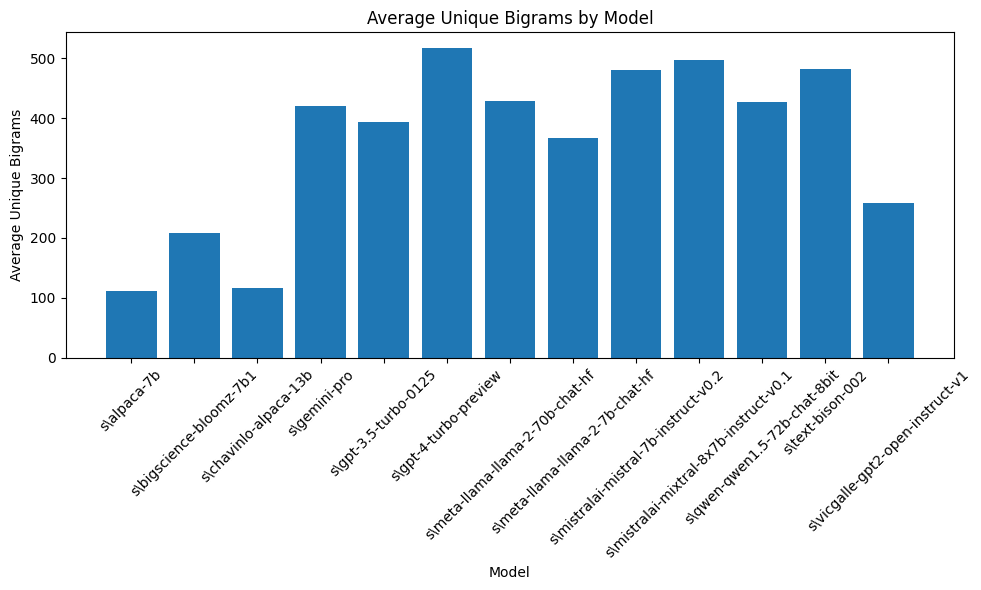

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(model_bigram_counts.keys(), model_bigram_counts.values())
plt.title('Average Unique Bigrams by Model')
plt.xlabel('Model')
plt.ylabel('Average Unique Bigrams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1087


Processing human documents: 100%|██████████| 1087/1087 [00:04<00:00, 222.93it/s]


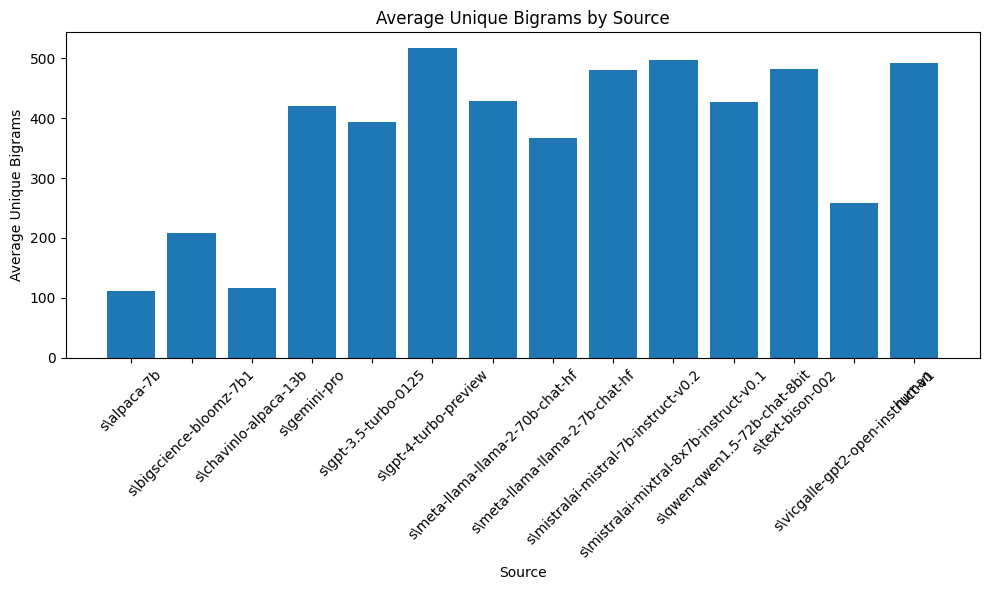

In [13]:
# Process human text to get average bigram count
human_documents_bigrams = []

# Count total lines first for the progress bar
with open(human_text_path, 'r', encoding='utf-8') as f:
    total_docs = sum(1 for _ in f)
    print(total_docs)

with open(human_text_path, 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=total_docs, desc="Processing human documents"):
        doc = json.loads(line)
        tokens = nltk.word_tokenize(doc['text'].lower())
        doc_bigrams = list(bigrams(tokens))
        bigram_count = len(set(doc_bigrams))
        human_documents_bigrams.append(bigram_count)

human_average_bigrams = sum(human_documents_bigrams) / len(human_documents_bigrams)

# Add human average to the model counts for comparison
model_bigram_counts['human'] = human_average_bigrams

# Create bar plot with both LLM and human data
plt.figure(figsize=(10, 6))
plt.bar(model_bigram_counts.keys(), model_bigram_counts.values())
plt.title('Average Unique Bigrams by Source')
plt.xlabel('Source')
plt.ylabel('Average Unique Bigrams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Unique Bigrams by Source:
----------------------------------------
Source               Average Bigrams
----------------------------------------
s\gpt-4-turbo-preview          517.30
s\mistralai-mixtral-8x7b-instruct-v0.1          496.71
human                         492.20
s\text-bison-002              481.91
s\mistralai-mistral-7b-instruct-v0.2          480.49
s\meta-llama-llama-2-70b-chat-hf          429.07
s\qwen-qwen1.5-72b-chat-8bit          426.89
s\gemini-pro                  420.32
s\gpt-3.5-turbo-0125          393.05
s\meta-llama-llama-2-7b-chat-hf          366.21
s\vicgalle-gpt2-open-instruct-v1          258.98
s\bigscience-bloomz-7b1          207.71
s\chavinlo-alpaca-13b          117.04
s\alpaca-7b                   111.74
----------------------------------------


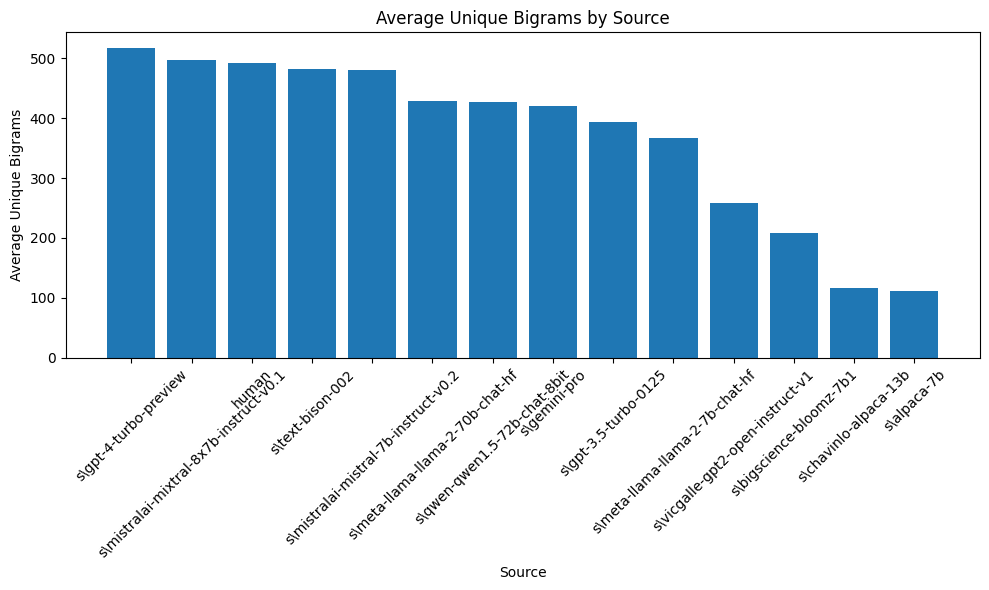

In [ ]:
human_average_bigrams = sum(human_documents_bigrams) / len(human_documents_bigrams)
model_bigram_counts['human'] = human_average_bigrams

for key in list(model_bigram_counts.keys()):
    if 'machine' in key.lower():
        # strip 'machine' from the name 
        new_key = key.lower().replace('machines', '').strip()
        model_bigram_counts[new_key] = model_bigram_counts.pop(key)

sorted_counts = dict(sorted(model_bigram_counts.items(), key=lambda x: x[1], reverse=True))

# table
print("\nAverage Unique Bigrams by Source:")
print("-" * 40)
print(f"{'Source':<20} {'Average Bigrams':>15}")
print("-" * 40)
for source, count in sorted_counts.items():
    print(f"{source:<20} {count:>15.2f}")
print("-" * 40)

# Create bar plot with cleaned labels
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.keys(), sorted_counts.values())
plt.title('Average Unique Bigrams by Source')
plt.xlabel('Source')
plt.ylabel('Average Unique Bigrams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Finding 1:
GPT 4 Turbo AND mistralai-mixtral-8x7b-instruct-v0.1 uses more unique bigrams than other models + humans 

Hypothesis from survey paper [Wu, Junchao, Shu Yang, Runzhe Zhan, Yulin Yuan, Lidia Sam Chao, and Derek Fai Wong. “A Survey on LLM-Generated Text Detection: Necessity, Methods, and Future Directions.” Computational Linguistics, January 8, 2025, 1–65. https://doi.org/10.1162/coli_a_00549.] won't work for our task with GPT Turbo 4 out in the mix 

Supporting Poonam's findings. 

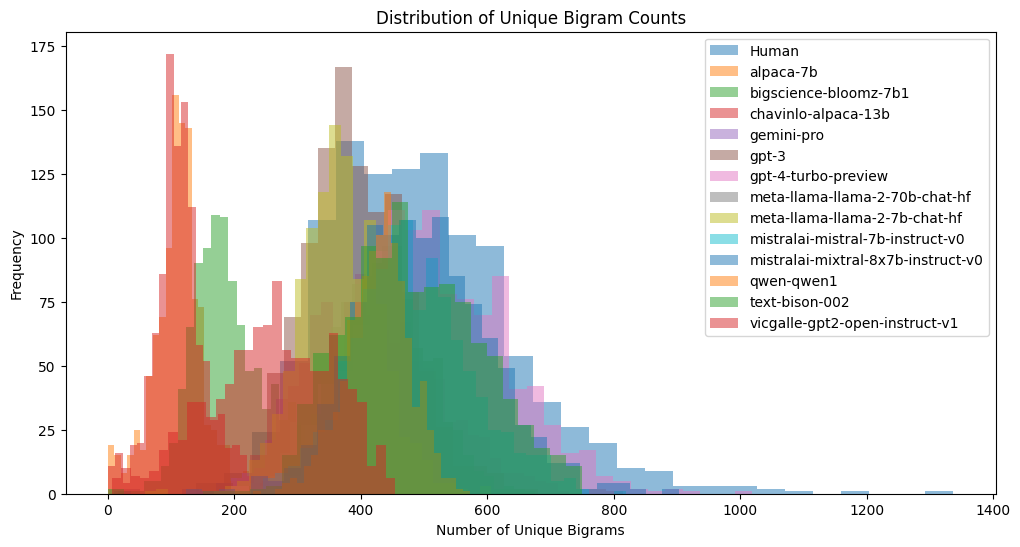

In [18]:
import os
# Load model documents if not already loaded
model_docs = {}
for model_file in glob.glob(llm_gen_text_path):
    model_name = os.path.basename(model_file).split('.')[0]
    model_docs[model_name] = []
    with open(model_file, 'r', encoding='utf-8') as f:
        for line in f:
            model_docs[model_name].append(json.loads(line))

# Create dictionary to store bigram counts per model
model_documents_bigrams = {}

# Calculate bigram counts for each model's documents
for model, docs in model_docs.items():
    model_documents_bigrams[model] = []
    for doc in docs:
        tokens = nltk.word_tokenize(doc['text'].lower())
        doc_bigrams = list(bigrams(tokens))
        model_documents_bigrams[model].append(len(set(doc_bigrams)))

# Add histogram/distribution plot of bigram counts
plt.figure(figsize=(12, 6))
plt.hist(human_documents_bigrams, alpha=0.5, label='Human', bins=30)
for model, counts in model_documents_bigrams.items():
    plt.hist(counts, alpha=0.5, label=model.replace('machines',''), bins=30)
plt.title('Distribution of Unique Bigram Counts')
plt.xlabel('Number of Unique Bigrams')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Finding 2:
The curve of unique bigrams for the human documents has a larger spread, even though gpt turbo 4 has more unique bigrams on average across all documents. 

Let's make a boxplot of the unique bigram counts for each source to compare the spread more closely. 


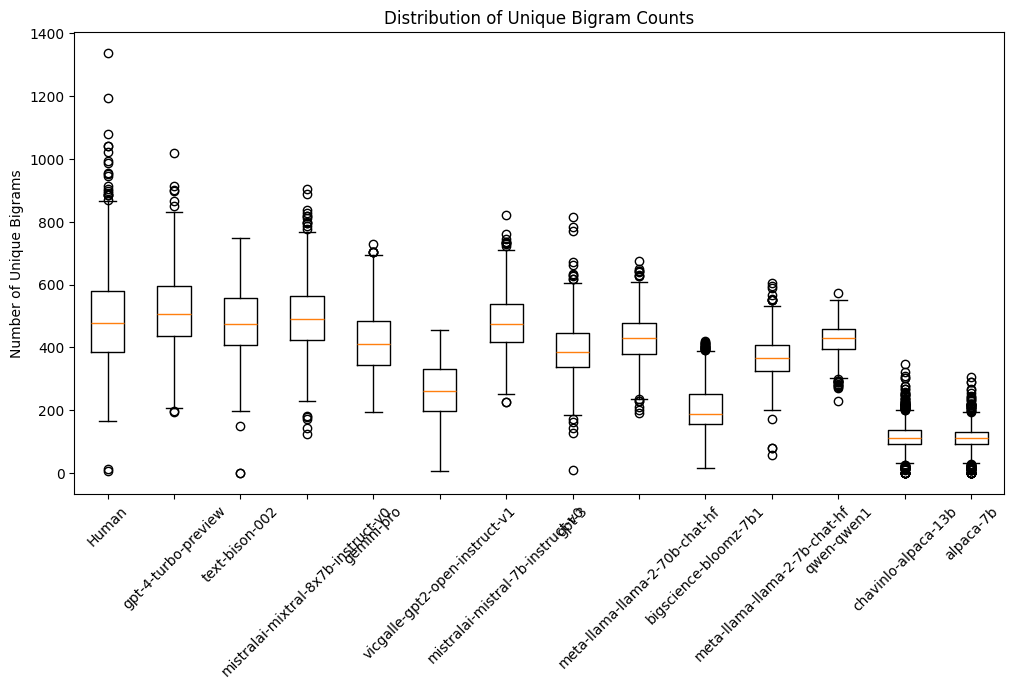

In [20]:
# Create box plot comparing bigram distributions
plt.figure(figsize=(12, 6))

# Calculate IQR for each distribution to sort by spread
all_data = [human_documents_bigrams] + [counts for counts in model_documents_bigrams.values()]
all_labels = ['Human'] + [model.replace('machines','') for model in model_documents_bigrams.keys()]

# Calculate IQR for each distribution
spreads = []
for data in all_data:
    q75, q25 = np.percentile(data, [75, 25])
    spreads.append(q75 - q25)

# Sort data and labels by IQR
sorted_indices = np.argsort(spreads)[::-1]  # Sort in descending order
sorted_data = [all_data[i] for i in sorted_indices]
sorted_labels = [all_labels[i] for i in sorted_indices]

plt.boxplot(sorted_data)
plt.title('Distribution of Unique Bigram Counts')
plt.ylabel('Number of Unique Bigrams')
plt.xticks(range(1, len(model_documents_bigrams) + 2),
          sorted_labels,
          rotation=45)
plt.show()

# Finding 3:
The spread of unique bigram counts is larger for the human documents, even though gpt turbo 4 has more unique bigrams on average across all documents. 



In [21]:
for source, counts in {'human': human_documents_bigrams, **model_documents_bigrams}.items():
    stats = {
        'mean': np.mean(counts),
        'median': np.median(counts),
        'std': np.std(counts),
        'min': np.min(counts),
        'max': np.max(counts)
    }
    print(f"\nStatistics for {source}:")
    for metric, value in stats.items():
        print(f"{metric}: {value:.2f}")


Statistics for human:
mean: 492.20
median: 477.00
std: 148.46
min: 6.00
max: 1337.00

Statistics for alpaca-7b:
mean: 111.74
median: 112.00
std: 41.72
min: 0.00
max: 305.00

Statistics for bigscience-bloomz-7b1:
mean: 207.71
median: 189.00
std: 74.42
min: 16.00
max: 419.00

Statistics for chavinlo-alpaca-13b:
mean: 117.04
median: 113.00
std: 45.07
min: 0.00
max: 347.00

Statistics for gemini-pro:
mean: 420.32
median: 411.00
std: 99.96
min: 195.00
max: 729.00

Statistics for gpt-3:
mean: 393.05
median: 386.00
std: 82.37
min: 10.00
max: 814.00

Statistics for gpt-4-turbo-preview:
mean: 517.30
median: 506.00
std: 113.98
min: 195.00
max: 1019.00

Statistics for meta-llama-llama-2-70b-chat-hf:
mean: 429.07
median: 430.00
std: 75.05
min: 192.00
max: 675.00

Statistics for meta-llama-llama-2-7b-chat-hf:
mean: 366.21
median: 365.00
std: 63.76
min: 58.00
max: 606.00

Statistics for mistralai-mistral-7b-instruct-v0:
mean: 480.49
median: 474.00
std: 92.80
min: 225.00
max: 820.00

Statistics for 

In [26]:
from collections import Counter
import json
import jsonlines
import glob
import pandas as pd
from tqdm import tqdm
from nltk.util import bigrams as nltk_bigrams

def get_top_bigrams(texts, n=20):
    all_bigrams = []
    for text in tqdm(texts, desc="Processing texts"):
        tokens = nltk.word_tokenize(text.lower())
        all_bigrams.extend(list(nltk_bigrams(tokens)))
    return Counter(all_bigrams).most_common(n)

# Load human documents from jsonl file
print("\nProcessing human documents...")
human_texts = []
with jsonlines.open(human_text_path) as reader:
    for doc in tqdm(reader, desc="Loading human docs"):
        human_texts.append(doc['text'])

# Get human top bigrams
human_top_bigrams = get_top_bigrams(human_texts)

# Load machine documents from jsonl files
print("\nProcessing machine documents...")
machine_texts = {}
for file_path in tqdm(glob.glob(llm_gen_text_path), desc="Processing models"):
    model_name = file_path.split('\\')[-1].replace('.jsonl', '')
    texts = []
    with jsonlines.open(file_path) as reader:
        for doc in tqdm(reader, desc=f"Loading {model_name} docs", leave=False):
            texts.append(doc['text'])
    machine_texts[model_name] = texts

# Get top bigrams for each model
print("\nCalculating top bigrams for each model...")
machine_top_bigrams = {}
for model, texts in tqdm(machine_texts.items(), desc="Processing models"):
    machine_top_bigrams[model] = get_top_bigrams(texts)

# Create dataframes for Excel
human_df = pd.DataFrame(human_top_bigrams, columns=['Bigram', 'Count'])
human_df.insert(0, 'Source', 'Human')

machine_dfs = []
for model, bigrams in tqdm(machine_top_bigrams.items(), desc="Creating dataframes"):
    df = pd.DataFrame(bigrams, columns=['Bigram', 'Count'])
    df.insert(0, 'Source', model)
    machine_dfs.append(df)

# Combine all dataframes
all_df = pd.concat([human_df] + machine_dfs, ignore_index=True)

# Save to Excel
print("\nSaving results...")
all_df.to_excel('top_bigrams.xlsx', index=False)

print("\nTop 20 Human Bigrams:")
print(human_top_bigrams)
print("\nTop 20 Machine Bigrams by Model:")
for model, bigrams in machine_top_bigrams.items():
    print(f"\n{model}:")
    print(bigrams)


Processing human documents...


Loading human docs: 1087it [00:00, 45816.13it/s]
Processing texts: 100%|██████████| 1087/1087 [00:03<00:00, 320.46it/s]



Processing machine documents...


Processing models: 100%|██████████| 13/13 [00:00<00:00, 36.03it/s]



Calculating top bigrams for each model...


Creating dataframes: 100%|██████████| 13/13 [00:00<00:00, 1305.42it/s]



Saving results...

Top 20 Human Bigrams:
[(('of', 'the'), 3101), (('.', '``'), 2912), (('in', 'the'), 2494), (('.', 'the'), 2426), ((',', "''"), 2414), (('.', "''"), 2146), ((',', 'and'), 1897), ((',', 'the'), 1727), (('to', 'the'), 1599), (('on', 'the'), 1191), (('said', '.'), 1071), (('in', 'a'), 980), (('for', 'the'), 900), (('at', 'the'), 855), ((',', 'a'), 820), ((',', 'but'), 806), (('and', 'the'), 760), (('to', 'be'), 701), ((',', 'which'), 698), (('it', "'s"), 664)]

Top 20 Machine Bigrams by Model:

alpaca-7b:
[(('.', '.'), 2479), (('of', 'the'), 1235), (('.', 'the'), 1179), ((',', 'and'), 731), (('in', 'the'), 655), (('//', '//'), 521), (('and', 'the'), 480), (('to', 'the'), 466), (('the', 'article'), 466), ((',', 'the'), 455), (('on', 'the'), 405), (('for', 'the'), 321), (('with', 'a'), 245), (('end', 'of'), 241), (('.', 'this'), 238), (('.', 'it'), 229), (('from', 'the'), 224), (('//', 'end'), 215), (('should', 'be'), 214), (('.', '//'), 207)]

bigscience-bloomz-7b1:
[(('.

In [28]:
# Compare text lengths

# TODO

In [27]:
# TODO - vocab richeness

In [29]:
#TODO - compare sentence lengths

In [30]:
# Part of speech analysis - TODO

In [31]:
# readability scores - TODO
